# Using Population Health Data to Peform Clustering and Predict Premature Death
- Mukunda Aithal

This is in an effort to advise policy changes to decrease premature death.


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split


## Reading Data and Removing Uneccesary Columns

In [2]:
data = pd.read_csv('analytic_data2022.csv', skiprows = 1)
data

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
0,0,0,0,US,United States,2022,NaN,7281.935564,4125218.0,917267406.0,...,0.507545,167227921,329484123,NaN,NaN,0.192690,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2022,NaN,10350.071456,88086.0,13668498.0,...,0.517027,2544566,4921532,NaN,NaN,0.409632,1957932.0,4779736.0,NaN,NaN
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,836.0,156081.0,...,0.515077,28919,56145,NaN,NaN,0.420022,22921.0,54571.0,NaN,NaN
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,3377.0,614143.0,...,0.515891,118287,229287,NaN,NaN,0.422791,77060.0,182265.0,NaN,NaN
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,539.0,68126.0,...,0.471837,11602,24589,NaN,NaN,0.677896,18613.0,27457.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,599.0,122399.0,...,0.483608,20637,42673,NaN,NaN,0.109163,4782.0,43806.0,NaN,NaN
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,111.0,66036.0,...,0.481338,11310,23497,NaN,NaN,0.464309,9887.0,21294.0,NaN,NaN
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,287.0,57690.0,...,0.493940,9985,20215,NaN,NaN,0.430959,9101.0,21118.0,NaN,NaN
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,115.0,21075.0,...,0.490464,3806,7760,NaN,NaN,0.359545,3068.0,8533.0,NaN,NaN


In [3]:
data1 = data[['statecode', 'countycode', 'fipscode', 'state', 'county', 'year', 'county_ranked', 'v001_rawvalue', 'v002_rawvalue', 'v036_rawvalue', 'v042_rawvalue', 'v037_rawvalue', 'v009_rawvalue', 'v011_rawvalue', 'v133_rawvalue', 'v070_rawvalue', 'v132_rawvalue','v049_rawvalue', 'v134_rawvalue','v045_rawvalue', 'v014_rawvalue', 'v085_rawvalue', 'v004_rawvalue', 'v088_rawvalue','v062_rawvalue', 'v005_rawvalue', 'v050_rawvalue', 'v155_rawvalue', 'v168_rawvalue', 'v069_rawvalue', 'v023_rawvalue', 'v024_rawvalue', 'v044_rawvalue', 'v082_rawvalue', 'v140_rawvalue', 'v043_rawvalue', 'v135_rawvalue', 'v125_rawvalue', 'v124_rawvalue', 'v136_rawvalue', 'v067_rawvalue', 'v137_rawvalue']].copy()
data1.rename(columns={'v001_rawvalue':'premature_death', 'v002_rawvalue':'poor_fair_health', 'v036_rawvalue':'poor_phys_health_days', 'v042_rawvalue':'poor_mental_health_days', 'v037_rawvalue':'low_birthweight', 'v009_rawvalue':'adult_smoking', 'v011_rawvalue':'adult_obesity', 'v133_rawvalue':'food_env_idx', 'v070_rawvalue':'phys_inactivity', 'v132_rawvalue':'access_excercise','v049_rawvalue':'excessive_drinking', 'v134_rawvalue':'drunk_driving_deaths','v045_rawvalue':'STIs', 'v014_rawvalue':'teen_births', 'v085_rawvalue':'uninsured', 'v004_rawvalue':'PCPs', 'v088_rawvalue':'dentists','v062_rawvalue':'mental_health_provs', 'v005_rawvalue':'preventabel_hosp_stays', 'v050_rawvalue':'mammo_screens', 'v155_rawvalue':'flu_vaccs', 'v168_rawvalue':'highschool_ed', 'v069_rawvalue':'college_ed', 'v023_rawvalue':'unemployment', 'v024_rawvalue':'child_in_poverty', 'v044_rawvalue':'income_ineq', 'v082_rawvalue':'child_single_parent_house', 'v140_rawvalue':'social_associations', 'v043_rawvalue':'violent_crime', 'v135_rawvalue':'injury_deaths', 'v125_rawvalue':'air_pollution', 'v124_rawvalue':'water_violations', 'v136_rawvalue':'housing_probs', 'v067_rawvalue':'driving_alone', 'v137_rawvalue':'long_commute_alone'}, inplace=True)
data1

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,income_ineq,child_single_parent_house,social_associations,violent_crime,injury_deaths,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
0,0,0,0,US,United States,2022,NaN,7281.935564,0.171052,3.907359,...,4.892074,0.252839,9.239229,386.464896,75.899512,7.5,0.404545,0.173139,0.749209,0.366
1,1,0,1000,AL,Alabama,2022,NaN,10350.071456,0.214102,4.814633,...,5.157920,0.311282,12.155364,479.919182,86.905718,9.0,0.134328,0.136859,0.848731,0.352
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,0.201000,4.510042,...,5.135446,0.276040,12.887290,272.282220,68.573070,9.5,0.000000,0.147289,0.867089,0.405
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,0.172000,4.168866,...,4.386478,0.183638,10.123906,203.660396,74.835079,7.2,0.000000,0.124205,0.829966,0.379
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,0.311000,5.884415,...,5.994927,0.540406,7.291582,414.277861,82.143057,9.0,0.000000,0.154600,0.840327,0.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163000,3.495993,...,4.185182,0.157228,8.974329,300.494146,103.352706,5.4,0.000000,0.100189,0.756772,0.188
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116000,2.779692,...,3.764975,0.185105,18.325946,NaN,61.803636,5.2,1.000000,0.182314,0.662721,0.156
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172000,3.792121,...,3.666622,0.107885,3.460892,71.006517,88.228374,6.9,1.000000,0.105365,0.793139,0.179
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173000,3.660729,...,3.523700,0.159215,16.655990,78.266105,80.505170,5.2,0.000000,0.084795,0.838251,0.076


We should probably remove the injury_deaths variable since it is not something policy changes can really affect.

In [4]:
data1 = data1.drop('injury_deaths', axis=1)
data1

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
0,0,0,0,US,United States,2022,NaN,7281.935564,0.171052,3.907359,...,0.157,4.892074,0.252839,9.239229,386.464896,7.5,0.404545,0.173139,0.749209,0.366
1,1,0,1000,AL,Alabama,2022,NaN,10350.071456,0.214102,4.814633,...,0.209,5.157920,0.311282,12.155364,479.919182,9.0,0.134328,0.136859,0.848731,0.352
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,0.201000,4.510042,...,0.149,5.135446,0.276040,12.887290,272.282220,9.5,0.000000,0.147289,0.867089,0.405
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,0.172000,4.168866,...,0.124,4.386478,0.183638,10.123906,203.660396,7.2,0.000000,0.124205,0.829966,0.379
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,0.311000,5.884415,...,0.375,5.994927,0.540406,7.291582,414.277861,9.0,0.000000,0.154600,0.840327,0.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163000,3.495993,...,0.084,4.185182,0.157228,8.974329,300.494146,5.4,0.000000,0.100189,0.756772,0.188
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116000,2.779692,...,0.043,3.764975,0.185105,18.325946,NaN,5.2,1.000000,0.182314,0.662721,0.156
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172000,3.792121,...,0.097,3.666622,0.107885,3.460892,71.006517,6.9,1.000000,0.105365,0.793139,0.179
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173000,3.660729,...,0.107,3.523700,0.159215,16.655990,78.266105,5.2,0.000000,0.084795,0.838251,0.076


## Exploratory Data Analysis

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   statecode                  3194 non-null   int64  
 1   countycode                 3194 non-null   int64  
 2   fipscode                   3194 non-null   int64  
 3   state                      3194 non-null   object 
 4   county                     3194 non-null   object 
 5   year                       3194 non-null   int64  
 6   county_ranked              3142 non-null   float64
 7   premature_death            3134 non-null   float64
 8   poor_fair_health           3194 non-null   float64
 9   poor_phys_health_days      3194 non-null   float64
 10  poor_mental_health_days    3194 non-null   float64
 11  low_birthweight            3088 non-null   float64
 12  adult_smoking              3194 non-null   float64
 13  adult_obesity              3194 non-null   float

### Statistical summary for numerical columns present in the dataset.

In [6]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
statecode,3194.0,30.249530,15.160981,0.000000,18.000000,29.000000,45.000000,56.000000
countycode,3194.0,101.886662,107.624838,0.000000,33.000000,77.000000,133.000000,840.000000
fipscode,3194.0,30351.417032,15179.045587,0.000000,18171.500000,29174.000000,45074.500000,56045.000000
year,3194.0,2022.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
county_ranked,3142.0,0.980904,0.136885,0.000000,1.000000,1.000000,1.000000,1.000000
premature_death,3134.0,8891.562734,2929.948857,3090.426825,6868.647904,8538.518058,10494.403953,30007.870277
poor_fair_health,3194.0,0.205681,0.050162,0.089000,0.166000,0.200000,0.241000,0.448000
poor_phys_health_days,3194.0,4.334505,0.750069,2.501610,3.749233,4.303930,4.824688,7.795640
poor_mental_health_days,3194.0,4.883518,0.690966,3.235874,4.395399,4.843651,5.379262,7.460286
low_birthweight,3088.0,0.082138,0.020293,0.028871,0.068281,0.079532,0.091418,0.216981


### Null values in each column.

mental_health_provs has the most null values. Along with teen_births, PCPs, violent_crime. 200 null values is approximately 6% of the total data. 

In [7]:
data1.isnull().sum( )

statecode                      0
countycode                     0
fipscode                       0
state                          0
county                         0
year                           0
county_ranked                 52
premature_death               60
poor_fair_health               0
poor_phys_health_days          0
poor_mental_health_days        0
low_birthweight              106
adult_smoking                  0
adult_obesity                  0
food_env_idx                  33
phys_inactivity                0
access_excercise              76
excessive_drinking             0
drunk_driving_deaths          27
STIs                         118
teen_births                  189
uninsured                      1
PCPs                         153
dentists                      90
mental_health_provs          204
preventabel_hosp_stays        53
mammo_screens                 20
flu_vaccs                     19
highschool_ed                  0
college_ed                     0
unemployme

It is also interesting that there are 60 entries where there is no value for premature death. 

In [8]:
data1[data1['premature_death'].isna()]

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
70,2,13,2013,AK,Aleutians East Borough,2022,0.0,NaN,0.228,4.033202,...,0.132,4.039208,0.276018,0.000000,NaN,NaN,0.0,0.139535,0.263580,0.000
74,2,60,2060,AK,Bristol Bay Borough,2022,0.0,NaN,0.187,4.087302,...,0.118,3.407407,0.160839,0.000000,0.000000,NaN,0.0,0.119403,0.665138,0.048
75,2,68,2068,AK,Denali Borough,2022,0.0,NaN,0.161,3.653963,...,0.072,4.694241,0.111538,0.000000,NaN,NaN,0.0,0.250000,0.327496,0.265
93,2,230,2230,AK,Skagway Municipality,2022,0.0,NaN,0.150,3.432585,...,0.050,3.575000,0.217877,0.000000,372.093023,NaN,0.0,0.100000,0.398010,0.006
97,2,282,2282,AK,Yakutat Borough,2022,0.0,NaN,0.207,4.319924,...,0.238,2.419761,0.051471,0.000000,NaN,NaN,0.0,0.152174,0.425170,0.000
278,8,53,8053,CO,Hinsdale County,2022,0.0,NaN,0.126,3.256829,...,0.188,4.969872,0.350877,0.000000,254.614895,5.0,0.0,0.129870,0.635294,0.046
280,8,57,8057,CO,Jackson County,2022,0.0,NaN,0.159,3.809112,...,0.167,3.556983,0.039106,0.000000,0.000000,4.7,0.0,0.113043,0.525641,0.375
282,8,61,8061,CO,Kiowa County,2022,0.0,NaN,0.164,4.068130,...,0.159,3.171887,0.143204,0.000000,NaN,5.6,1.0,0.084034,0.801802,0.166
291,8,79,8079,CO,Mineral County,2022,0.0,NaN,0.120,3.221223,...,0.150,2.627371,0.108527,0.000000,137.174211,5.0,0.0,0.090667,0.633188,0.259
307,8,111,8111,CO,San Juan County,2022,0.0,NaN,0.139,3.418458,...,0.170,4.410361,0.126050,0.000000,71.839080,5.1,0.0,0.169811,0.574405,0.166


It should be safe to get rid of these data points since it is only ~ 1% of the data.

In [9]:
data1 = data1[data1['premature_death'].notna()]
data1[data1['premature_death'].isna()]

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone


In [10]:
data1.isnull().sum()

statecode                      0
countycode                     0
fipscode                       0
state                          0
county                         0
year                           0
county_ranked                 52
premature_death                0
poor_fair_health               0
poor_phys_health_days          0
poor_mental_health_days        0
low_birthweight               49
adult_smoking                  0
adult_obesity                  0
food_env_idx                  32
phys_inactivity                0
access_excercise              60
excessive_drinking             0
drunk_driving_deaths          18
STIs                          81
teen_births                  129
uninsured                      0
PCPs                         151
dentists                      90
mental_health_provs          189
preventabel_hosp_stays        25
mammo_screens                 13
flu_vaccs                     12
highschool_ed                  0
college_ed                     0
unemployme

We should also get rid of the rows that reference states since they summarize data for all of its counties. 

In [11]:
data1 = data1[data1.county_ranked.notna()]

In [12]:
data1.isnull().sum()

statecode                      0
countycode                     0
fipscode                       0
state                          0
county                         0
year                           0
county_ranked                  0
premature_death                0
poor_fair_health               0
poor_phys_health_days          0
poor_mental_health_days        0
low_birthweight               49
adult_smoking                  0
adult_obesity                  0
food_env_idx                  32
phys_inactivity                0
access_excercise              60
excessive_drinking             0
drunk_driving_deaths          18
STIs                          81
teen_births                  129
uninsured                      0
PCPs                         151
dentists                      90
mental_health_provs          189
preventabel_hosp_stays        25
mammo_screens                 13
flu_vaccs                     12
highschool_ed                  0
college_ed                     0
unemployme

Water violations is a categorical field where 1 is Yes and 0 is No. Therefore, we could use what the majority of counties in the same state has and use that value. 

In [13]:
data1['water_violations'].value_counts(normalize=True)

0.0    0.651316
1.0    0.348684
Name: water_violations, dtype: float64

The majority of counties have water_violations = 0. Therefore, we can use this value when not sure of what to use.

Now let's look at which rows have null values for water_violations

In [14]:
data1[data1['water_violations'].isna()]

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
559,15,1,15001,HI,Hawaii County,2022,1.0,6985.695274,0.187,3.996899,...,0.161,5.059069,0.256113,6.649695,237.331409,11.5,NaN,0.225040,0.707863,0.371
560,15,3,15003,HI,Honolulu County,2022,1.0,5724.587798,0.166,3.294937,...,0.091,4.126551,0.215797,6.413131,237.652324,3.7,NaN,0.273879,0.651991,0.444
562,15,7,15007,HI,Kauai County,2022,1.0,5966.346928,0.165,3.581954,...,0.101,4.431938,0.226961,9.682819,235.303946,2.6,NaN,0.233296,0.772666,0.337
563,15,9,15009,HI,Maui County,2022,1.0,5762.771048,0.159,3.579893,...,0.106,4.171584,0.237410,7.466386,293.272171,4.5,NaN,0.272133,0.743922,0.288
2963,51,510,51510,VA,Alexandria city,2022,1.0,3866.609573,0.141,3.101856,...,0.127,4.120258,0.228832,21.012620,186.367434,8.6,NaN,0.168262,0.565875,0.463
2964,51,520,51520,VA,Bristol city,2022,1.0,11162.435690,0.224,4.801248,...,0.307,4.917229,0.376129,22.073738,266.604166,6.7,NaN,0.147973,0.783070,0.172
2965,51,530,51530,VA,Buena Vista city,2022,1.0,9169.945818,0.250,5.343327,...,0.204,5.311381,0.277027,13.893177,97.972718,6.8,NaN,0.165354,0.834107,0.202
2966,51,540,51540,VA,Charlottesville city,2022,1.0,5438.291895,0.183,3.991179,...,0.154,6.438576,0.332227,21.368426,479.503675,7.2,NaN,0.194467,0.588530,0.127
2967,51,550,51550,VA,Chesapeake city,2022,1.0,6899.900027,0.169,3.613934,...,0.097,3.673430,0.260897,9.353238,423.187701,7.2,NaN,0.144485,0.822286,0.418
2968,51,570,51570,VA,Colonial Heights city,2022,1.0,11979.489422,0.187,4.058508,...,0.148,4.168827,0.429916,12.665515,289.977477,7.9,NaN,0.167966,0.840554,0.365


However, all of the null values for water violations are either Hawaii or Virginia.

Examining Hawaii:

In [15]:
data1[data1['state'] == 'HI']

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
559,15,1,15001,HI,Hawaii County,2022,1.0,6985.695274,0.187,3.996899,...,0.161,5.059069,0.256113,6.649695,237.331409,11.5,NaN,0.225040,0.707863,0.371
560,15,3,15003,HI,Honolulu County,2022,1.0,5724.587798,0.166,3.294937,...,0.091,4.126551,0.215797,6.413131,237.652324,3.7,NaN,0.273879,0.651991,0.444
562,15,7,15007,HI,Kauai County,2022,1.0,5966.346928,0.165,3.581954,...,0.101,4.431938,0.226961,9.682819,235.303946,2.6,NaN,0.233296,0.772666,0.337
563,15,9,15009,HI,Maui County,2022,1.0,5762.771048,0.159,3.579893,...,0.106,4.171584,0.237410,7.466386,293.272171,4.5,NaN,0.272133,0.743922,0.288


All Hawaii entries do not have any water violation value. Therefore we can use 0 for these. 

In [16]:
data1.loc[data1['state'] == 'HI', 'water_violations'] = 0
data1[data1['state'] == 'HI']

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
559,15,1,15001,HI,Hawaii County,2022,1.0,6985.695274,0.187,3.996899,...,0.161,5.059069,0.256113,6.649695,237.331409,11.5,0.0,0.225040,0.707863,0.371
560,15,3,15003,HI,Honolulu County,2022,1.0,5724.587798,0.166,3.294937,...,0.091,4.126551,0.215797,6.413131,237.652324,3.7,0.0,0.273879,0.651991,0.444
562,15,7,15007,HI,Kauai County,2022,1.0,5966.346928,0.165,3.581954,...,0.101,4.431938,0.226961,9.682819,235.303946,2.6,0.0,0.233296,0.772666,0.337
563,15,9,15009,HI,Maui County,2022,1.0,5762.771048,0.159,3.579893,...,0.106,4.171584,0.237410,7.466386,293.272171,4.5,0.0,0.272133,0.743922,0.288


Examining Virginia:

In [17]:
data1[data1['state'] == 'VA']

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
2868,51,1,51001,VA,Accomack County,2022,1.0,10230.971511,0.241,4.711178,...,0.241,4.152460,0.361335,11.139993,225.867989,6.6,0.0,0.130597,0.722428,0.308
2869,51,3,51003,VA,Albemarle County,2022,1.0,4802.226640,0.140,3.294580,...,0.070,4.444595,0.218143,10.427147,100.243721,6.1,0.0,0.138143,0.731431,0.240
2870,51,5,51005,VA,Alleghany County,2022,1.0,9732.096211,0.215,4.622829,...,0.179,4.918415,0.285513,16.823688,195.935910,7.0,0.0,0.112760,0.884109,0.293
2871,51,7,51007,VA,Amelia County,2022,1.0,10960.742844,0.200,4.197808,...,0.121,4.674177,0.189699,9.889692,117.105160,7.5,0.0,0.126305,0.875382,0.708
2872,51,9,51009,VA,Amherst County,2022,1.0,8639.771012,0.204,4.332885,...,0.161,4.417184,0.253603,15.503876,133.080741,7.5,0.0,0.108759,0.805447,0.342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,51,800,51800,VA,Suffolk city,2022,1.0,7887.477482,0.185,3.834008,...,0.137,4.260889,0.301204,12.159639,276.488708,7.1,NaN,0.150904,0.856989,0.486
2997,51,810,51810,VA,Virginia Beach city,2022,1.0,6177.765444,0.156,3.477045,...,0.124,3.507920,0.259117,7.489322,152.413565,6.7,NaN,0.147203,0.803206,0.319
2998,51,820,51820,VA,Waynesboro city,2022,1.0,9451.946315,0.212,4.401330,...,0.189,4.615649,0.356961,18.117543,186.981419,6.9,NaN,0.167305,0.830194,0.332
2999,51,830,51830,VA,Williamsburg city,2022,1.0,5946.281213,0.171,3.897832,...,0.200,5.429568,0.281758,14.711783,182.113821,6.9,NaN,0.199143,0.643516,0.213


In [18]:
data1[data1.state == 'VA']['water_violations'].value_counts(normalize=True)

0.0    0.810526
1.0    0.189474
Name: water_violations, dtype: float64

The majority of VA counties have 0 for water_violations. Therefore, we can use this for the null values.

In [19]:
data1.loc[data1['state'] == 'VA', 'water_violations'] = 0
data1[data1['state'] == 'VA']

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
2868,51,1,51001,VA,Accomack County,2022,1.0,10230.971511,0.241,4.711178,...,0.241,4.152460,0.361335,11.139993,225.867989,6.6,0.0,0.130597,0.722428,0.308
2869,51,3,51003,VA,Albemarle County,2022,1.0,4802.226640,0.140,3.294580,...,0.070,4.444595,0.218143,10.427147,100.243721,6.1,0.0,0.138143,0.731431,0.240
2870,51,5,51005,VA,Alleghany County,2022,1.0,9732.096211,0.215,4.622829,...,0.179,4.918415,0.285513,16.823688,195.935910,7.0,0.0,0.112760,0.884109,0.293
2871,51,7,51007,VA,Amelia County,2022,1.0,10960.742844,0.200,4.197808,...,0.121,4.674177,0.189699,9.889692,117.105160,7.5,0.0,0.126305,0.875382,0.708
2872,51,9,51009,VA,Amherst County,2022,1.0,8639.771012,0.204,4.332885,...,0.161,4.417184,0.253603,15.503876,133.080741,7.5,0.0,0.108759,0.805447,0.342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,51,800,51800,VA,Suffolk city,2022,1.0,7887.477482,0.185,3.834008,...,0.137,4.260889,0.301204,12.159639,276.488708,7.1,0.0,0.150904,0.856989,0.486
2997,51,810,51810,VA,Virginia Beach city,2022,1.0,6177.765444,0.156,3.477045,...,0.124,3.507920,0.259117,7.489322,152.413565,6.7,0.0,0.147203,0.803206,0.319
2998,51,820,51820,VA,Waynesboro city,2022,1.0,9451.946315,0.212,4.401330,...,0.189,4.615649,0.356961,18.117543,186.981419,6.9,0.0,0.167305,0.830194,0.332
2999,51,830,51830,VA,Williamsburg city,2022,1.0,5946.281213,0.171,3.897832,...,0.200,5.429568,0.281758,14.711783,182.113821,6.9,0.0,0.199143,0.643516,0.213


For the rest of the missing values, it should be safe to use the national averages for those features. State averages could also be used but national averages should be sufficient since there is only around 3000 data entries.

In [20]:
data1.isnull().sum()

statecode                      0
countycode                     0
fipscode                       0
state                          0
county                         0
year                           0
county_ranked                  0
premature_death                0
poor_fair_health               0
poor_phys_health_days          0
poor_mental_health_days        0
low_birthweight               49
adult_smoking                  0
adult_obesity                  0
food_env_idx                  32
phys_inactivity                0
access_excercise              60
excessive_drinking             0
drunk_driving_deaths          18
STIs                          81
teen_births                  129
uninsured                      0
PCPs                         151
dentists                      90
mental_health_provs          189
preventabel_hosp_stays        25
mammo_screens                 13
flu_vaccs                     12
highschool_ed                  0
college_ed                     0
unemployme

In [21]:
data1 = data1.fillna(data1.mean())
data1.isnull().sum()

/var/folders/8h/trr3c7zs2_52856n64wsm0280000gn/T/ipykernel_20467/3887783538.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1 = data1.fillna(data1.mean())


statecode                    0
countycode                   0
fipscode                     0
state                        0
county                       0
year                         0
county_ranked                0
premature_death              0
poor_fair_health             0
poor_phys_health_days        0
poor_mental_health_days      0
low_birthweight              0
adult_smoking                0
adult_obesity                0
food_env_idx                 0
phys_inactivity              0
access_excercise             0
excessive_drinking           0
drunk_driving_deaths         0
STIs                         0
teen_births                  0
uninsured                    0
PCPs                         0
dentists                     0
mental_health_provs          0
preventabel_hosp_stays       0
mammo_screens                0
flu_vaccs                    0
highschool_ed                0
college_ed                   0
unemployment                 0
child_in_poverty             0
income_i

In [22]:
data1

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,0.201,4.510042,...,0.149,5.135446,0.276040,12.887290,272.282220,9.5,0.0,0.147289,0.867089,0.405
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,0.172,4.168866,...,0.124,4.386478,0.183638,10.123906,203.660396,7.2,0.0,0.124205,0.829966,0.379
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,0.311,5.884415,...,0.375,5.994927,0.540406,7.291582,414.277861,9.0,0.0,0.154600,0.840327,0.368
5,1,7,1007,AL,Bibb County,2022,1.0,11191.474323,0.250,5.161337,...,0.219,5.394051,0.367041,8.930964,89.349126,9.4,0.0,0.111842,0.876526,0.553
6,1,9,1009,AL,Blount County,2022,1.0,10787.014541,0.232,4.948393,...,0.189,4.764969,0.225584,7.436101,482.690611,9.4,0.0,0.104612,0.883416,0.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163,3.495993,...,0.084,4.185182,0.157228,8.974329,300.494146,5.4,0.0,0.100189,0.756772,0.188
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116,2.779692,...,0.043,3.764975,0.185105,18.325946,253.652173,5.2,1.0,0.182314,0.662721,0.156
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172,3.792121,...,0.097,3.666622,0.107885,3.460892,71.006517,6.9,1.0,0.105365,0.793139,0.179
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173,3.660729,...,0.107,3.523700,0.159215,16.655990,78.266105,5.2,0.0,0.084795,0.838251,0.076


### Outliers

/var/folders/8h/trr3c7zs2_52856n64wsm0280000gn/T/ipykernel_20467/2967692686.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


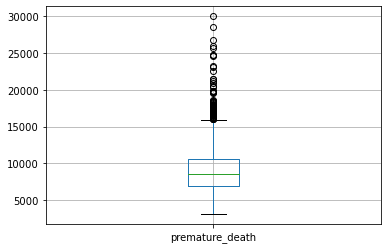

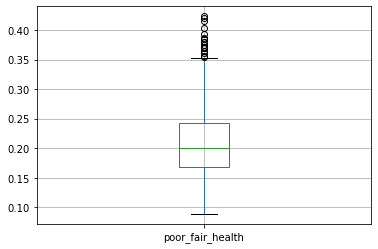

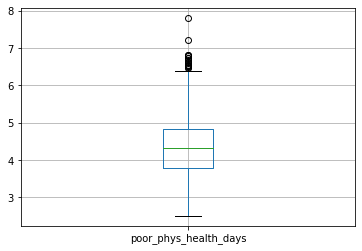

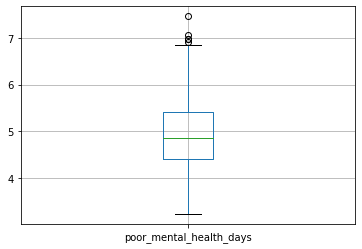

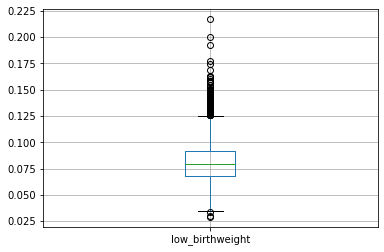

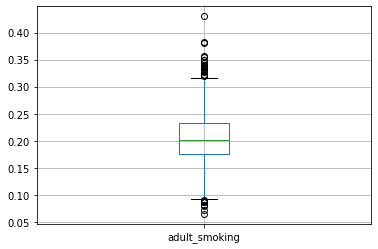

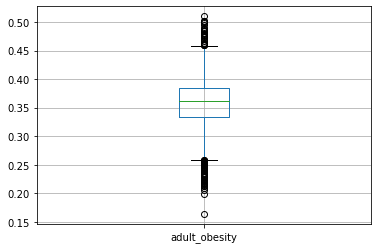

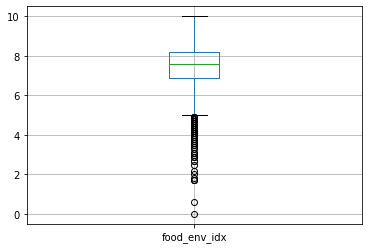

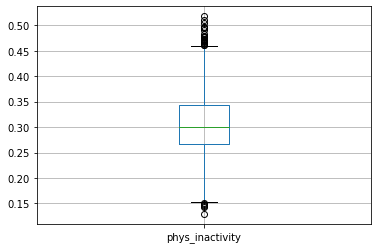

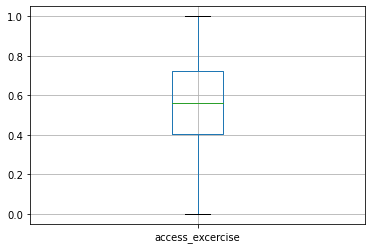

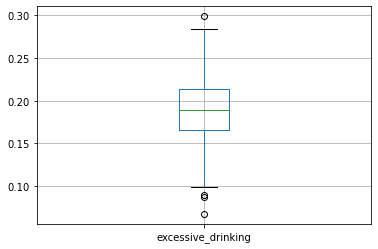

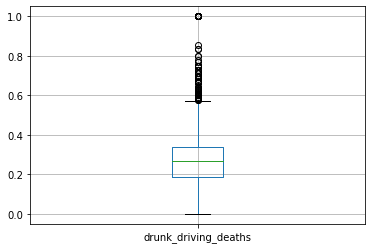

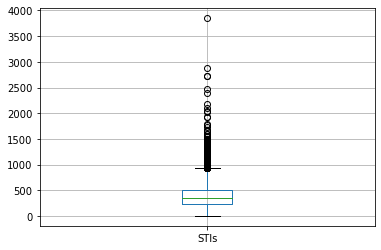

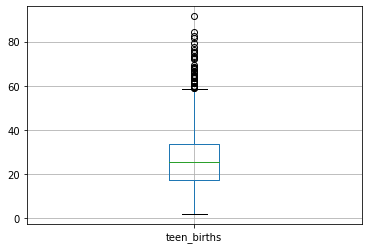

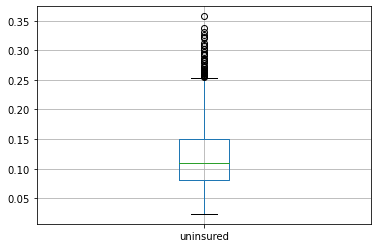

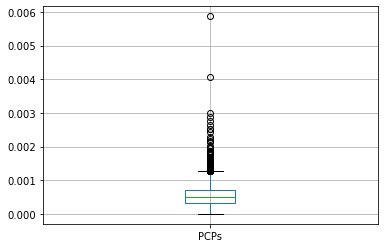

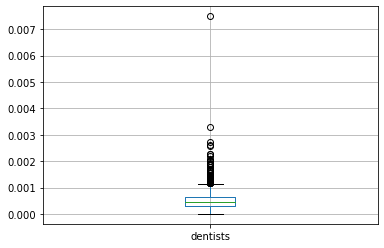

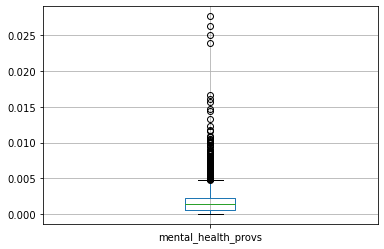

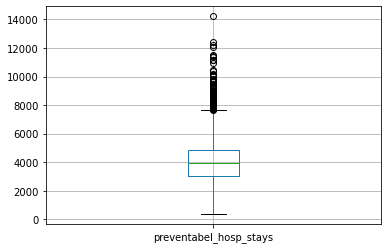

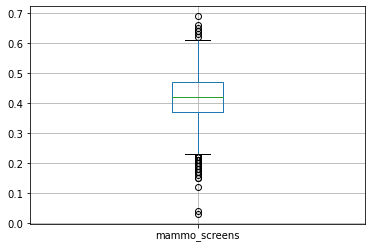

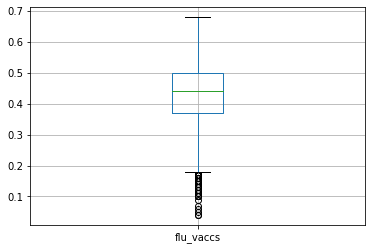

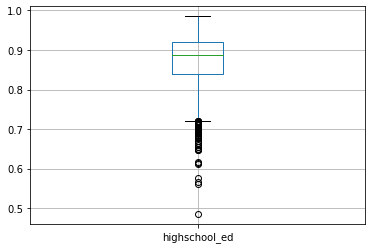

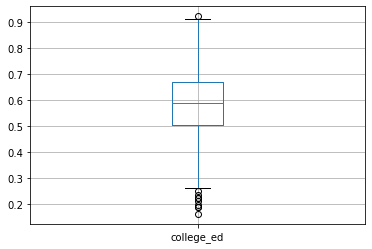

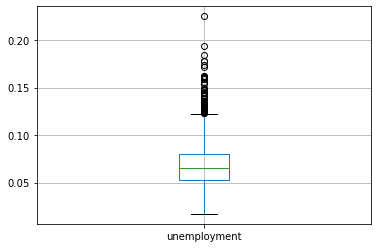

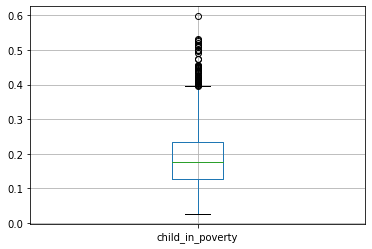

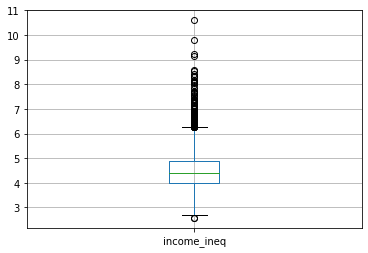

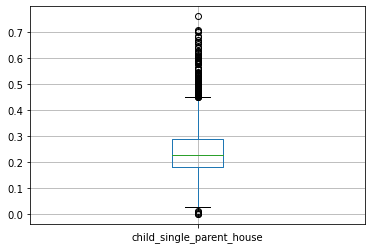

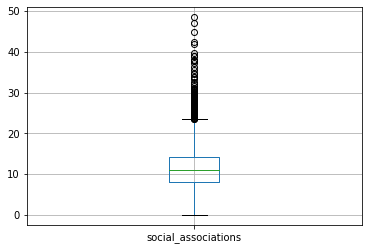

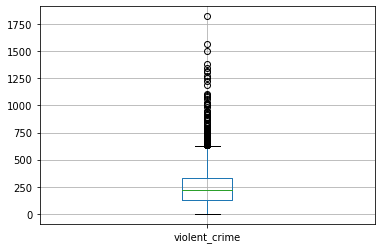

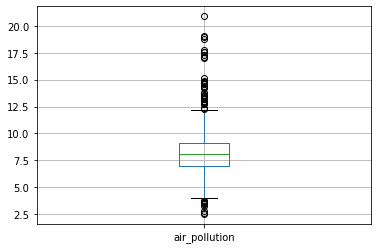

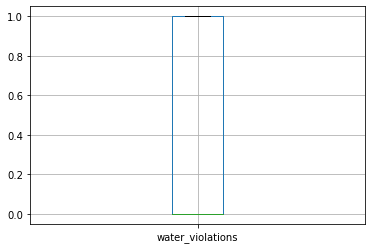

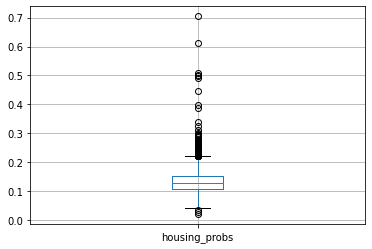

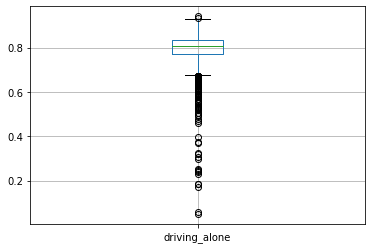

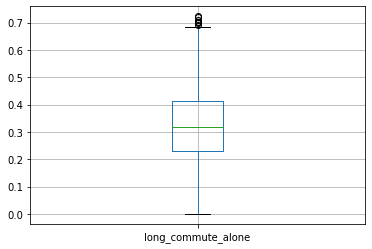

In [23]:
data_plot = data1.drop(columns=['statecode', 'countycode', 'fipscode','state', 'county', 'year', 'county_ranked'])
for column in data_plot:
    plt.figure()
    data_plot.boxplot([column])    

Alot of the variables seems to have long tails. Therefore, using data outside of the 3 standard deviations might be too limiting. It would be safer to use data outside 4 stds.

In [24]:
data1 = data1[(np.abs(stats.zscore(data1.loc[:, 'adult_smoking':])) < 4).all(axis=1)]

In [25]:
data1

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,0.201,4.510042,...,0.149,5.135446,0.276040,12.887290,272.282220,9.5,0.0,0.147289,0.867089,0.405
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,0.172,4.168866,...,0.124,4.386478,0.183638,10.123906,203.660396,7.2,0.0,0.124205,0.829966,0.379
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,0.311,5.884415,...,0.375,5.994927,0.540406,7.291582,414.277861,9.0,0.0,0.154600,0.840327,0.368
5,1,7,1007,AL,Bibb County,2022,1.0,11191.474323,0.250,5.161337,...,0.219,5.394051,0.367041,8.930964,89.349126,9.4,0.0,0.111842,0.876526,0.553
6,1,9,1009,AL,Blount County,2022,1.0,10787.014541,0.232,4.948393,...,0.189,4.764969,0.225584,7.436101,482.690611,9.4,0.0,0.104612,0.883416,0.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163,3.495993,...,0.084,4.185182,0.157228,8.974329,300.494146,5.4,0.0,0.100189,0.756772,0.188
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116,2.779692,...,0.043,3.764975,0.185105,18.325946,253.652173,5.2,1.0,0.182314,0.662721,0.156
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172,3.792121,...,0.097,3.666622,0.107885,3.460892,71.006517,6.9,1.0,0.105365,0.793139,0.179
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173,3.660729,...,0.107,3.523700,0.159215,16.655990,78.266105,5.2,0.0,0.084795,0.838251,0.076


### Examining correlations.

In [26]:
corr = data1.drop(columns=['statecode', 'countycode', 'fipscode', 'year', 'county_ranked']).corr().style.background_gradient(cmap='coolwarm')
corr

,premature_death,poor_fair_health,poor_phys_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,food_env_idx,phys_inactivity,access_excercise,excessive_drinking,drunk_driving_deaths,STIs,teen_births,uninsured,PCPs,dentists,mental_health_provs,preventabel_hosp_stays,mammo_screens,flu_vaccs,highschool_ed,college_ed,unemployment,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
premature_death,1.000000,0.710921,0.713898,0.658307,0.575858,0.665739,0.565996,-0.574938,0.668029,-0.330996,-0.521611,-0.049017,0.344686,0.666540,0.320284,-0.295474,-0.266123,-0.137731,0.437071,-0.381704,-0.322838,-0.536922,-0.549628,0.267660,0.735346,0.425160,0.572019,-0.085325,0.310676,0.128194,-0.046793,0.098230,0.314940,0.115244
poor_fair_health,0.710921,1.000000,0.899553,0.736377,0.554746,0.690041,0.688628,-0.663090,0.860271,-0.344354,-0.672225,-0.135898,0.322901,0.783084,0.558025,-0.390606,-0.365826,-0.229470,0.495608,-0.526838,-0.377199,-0.866911,-0.774788,0.292920,0.824458,0.484488,0.573652,-0.201268,0.290214,0.264926,0.003365,0.233690,0.310256,0.137749
poor_phys_health_days,0.713898,0.899553,1.000000,0.920593,0.496400,0.825997,0.592668,-0.632928,0.754975,-0.372835,-0.655544,-0.076676,0.205473,0.684884,0.350583,-0.371810,-0.349214,-0.196118,0.470349,-0.460389,-0.343761,-0.708380,-0.734180,0.314755,0.779975,0.440301,0.488285,-0.239809,0.234474,0.226524,-0.020688,0.166021,0.301054,0.182808
poor_mental_health_days,0.658307,0.736377,0.920593,1.000000,0.471009,0.839923,0.524993,-0.547148,0.643245,-0.359436,-0.569909,-0.076305,0.145170,0.533049,0.162529,-0.337956,-0.335069,-0.195536,0.459248,-0.320304,-0.224659,-0.516880,-0.612650,0.329454,0.665625,0.368571,0.424738,-0.181849,0.198003,0.256509,-0.040656,0.046221,0.382003,0.263204
low_birthweight,0.575858,0.554746,0.496400,0.471009,1.000000,0.378535,0.363596,-0.417947,0.484034,-0.122031,-0.468373,-0.050570,0.536220,0.443111,0.222789,-0.139480,-0.146104,-0.057800,0.353473,-0.232585,-0.154911,-0.416863,-0.345564,0.288366,0.614089,0.469222,0.639572,-0.146852,0.391084,0.126859,-0.031785,0.230799,0.268207,0.177784
adult_smoking,0.665739,0.690041,0.825997,0.839923,0.378535,1.000000,0.646904,-0.506084,0.728075,-0.463626,-0.395075,-0.038374,0.094508,0.581162,0.130447,-0.407077,-0.402450,-0.289809,0.484801,-0.210983,-0.254803,-0.512895,-0.643591,0.211557,0.664461,0.317239,0.367985,-0.000672,0.082137,0.143289,-0.116847,-0.118534,0.401390,0.179087
adult_obesity,0.565996,0.688628,0.592668,0.524993,0.363596,0.646904,1.000000,-0.478149,0.779058,-0.404279,-0.408409,-0.079821,0.279956,0.573365,0.260288,-0.394381,-0.349386,-0.315891,0.443394,-0.186208,-0.264239,-0.541400,-0.525199,0.127244,0.585033,0.288451,0.422105,0.084733,0.139063,0.221965,-0.086857,-0.110121,0.458395,0.026194
food_env_idx,-0.574938,-0.663090,-0.632928,-0.547148,-0.417947,-0.506084,-0.478149,1.000000,-0.589572,0.307726,0.477276,0.097744,-0.260102,-0.584930,-0.439087,0.232211,0.237266,0.069602,-0.293267,0.416952,0.383536,0.470464,0.470617,-0.207939,-0.689045,-0.411552,-0.450378,0.125377,-0.219999,-0.114090,-0.046749,-0.168519,-0.138587,0.065822
phys_inactivity,0.668029,0.860271,0.754975,0.643245,0.484034,0.728075,0.779058,-0.589572,1.000000,-0.423884,-0.602514,-0.160772,0.300888,0.726767,0.478794,-0.419460,-0.409732,-0.296724,0.520867,-0.368270,-0.329781,-0.745253,-0.684102,0.097430,0.735232,0.407443,0.489348,-0.032637,0.194489,0.243416,-0.060401,0.021351,0.397384,0.108123
access_excercise,-0.330996,-0.344354,-0.372835,-0.359436,-0.122031,-0.463626,-0.404279,0.307726,-0.423884,1.000000,0.189353,0.026609,0.111026,-0.300499,-0.195602,0.421821,0.455035,0.352828,-0.202872,0.166891,0.320296,0.285880,0.393956,0.120347,-0.341047,-0.087395,-0.074370,-0.051270,0.152517,0.013562,0.094899,0.259937,-0.181974,-0.205151


When looking at the correlations between the health outcomes and factors, most values make sense. One unexpected correlation is the negative correlation between drinking water violations and health outcomes. However, this is not worth investigating.

Now we can take a look at just the input variables to see if there is any major correlations.

In [27]:
var_corr = data1.drop(columns=['statecode', 'countycode', 'fipscode', 'year', 'county_ranked', 'premature_death', 'poor_fair_health', 'poor_phys_health_days', 'poor_mental_health_days']).corr().style.background_gradient(cmap='coolwarm')
var_corr

,low_birthweight,adult_smoking,adult_obesity,food_env_idx,phys_inactivity,access_excercise,excessive_drinking,drunk_driving_deaths,STIs,teen_births,uninsured,PCPs,dentists,mental_health_provs,preventabel_hosp_stays,mammo_screens,flu_vaccs,highschool_ed,college_ed,unemployment,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
low_birthweight,1.000000,0.378535,0.363596,-0.417947,0.484034,-0.122031,-0.468373,-0.050570,0.536220,0.443111,0.222789,-0.139480,-0.146104,-0.057800,0.353473,-0.232585,-0.154911,-0.416863,-0.345564,0.288366,0.614089,0.469222,0.639572,-0.146852,0.391084,0.126859,-0.031785,0.230799,0.268207,0.177784
adult_smoking,0.378535,1.000000,0.646904,-0.506084,0.728075,-0.463626,-0.395075,-0.038374,0.094508,0.581162,0.130447,-0.407077,-0.402450,-0.289809,0.484801,-0.210983,-0.254803,-0.512895,-0.643591,0.211557,0.664461,0.317239,0.367985,-0.000672,0.082137,0.143289,-0.116847,-0.118534,0.401390,0.179087
adult_obesity,0.363596,0.646904,1.000000,-0.478149,0.779058,-0.404279,-0.408409,-0.079821,0.279956,0.573365,0.260288,-0.394381,-0.349386,-0.315891,0.443394,-0.186208,-0.264239,-0.541400,-0.525199,0.127244,0.585033,0.288451,0.422105,0.084733,0.139063,0.221965,-0.086857,-0.110121,0.458395,0.026194
food_env_idx,-0.417947,-0.506084,-0.478149,1.000000,-0.589572,0.307726,0.477276,0.097744,-0.260102,-0.584930,-0.439087,0.232211,0.237266,0.069602,-0.293267,0.416952,0.383536,0.470464,0.470617,-0.207939,-0.689045,-0.411552,-0.450378,0.125377,-0.219999,-0.114090,-0.046749,-0.168519,-0.138587,0.065822
phys_inactivity,0.484034,0.728075,0.779058,-0.589572,1.000000,-0.423884,-0.602514,-0.160772,0.300888,0.726767,0.478794,-0.419460,-0.409732,-0.296724,0.520867,-0.368270,-0.329781,-0.745253,-0.684102,0.097430,0.735232,0.407443,0.489348,-0.032637,0.194489,0.243416,-0.060401,0.021351,0.397384,0.108123
access_excercise,-0.122031,-0.463626,-0.404279,0.307726,-0.423884,1.000000,0.189353,0.026609,0.111026,-0.300499,-0.195602,0.421821,0.455035,0.352828,-0.202872,0.166891,0.320296,0.285880,0.393956,0.120347,-0.341047,-0.087395,-0.074370,-0.051270,0.152517,0.013562,0.094899,0.259937,-0.181974,-0.205151
excessive_drinking,-0.468373,-0.395075,-0.408409,0.477276,-0.602514,0.189353,1.000000,0.187320,-0.285276,-0.501652,-0.365757,0.204811,0.179305,0.075903,-0.340251,0.452675,0.146183,0.519550,0.432018,-0.152728,-0.515857,-0.307876,-0.383697,0.237528,-0.199745,-0.206930,-0.008972,-0.183396,-0.209847,-0.139770
drunk_driving_deaths,-0.050570,-0.038374,-0.079821,0.097744,-0.160772,0.026609,0.187320,1.000000,0.016072,-0.119475,-0.156025,0.035935,0.076462,0.088369,-0.106194,0.109721,-0.016647,0.140506,0.082611,0.061636,-0.066299,-0.008913,-0.028764,-0.009708,-0.033617,-0.098851,0.039724,-0.015785,-0.073493,-0.011299
STIs,0.536220,0.094508,0.279956,-0.260102,0.300888,0.111026,-0.285276,0.016072,1.000000,0.265507,0.106437,0.078225,0.141318,0.193056,0.190657,-0.032462,0.043228,-0.216063,-0.052289,0.210722,0.383453,0.371197,0.623246,-0.065140,0.519087,0.177776,-0.009982,0.392893,0.125654,-0.084298
teen_births,0.443111,0.581162,0.573365,-0.584930,0.726767,-0.300499,-0.501652,-0.119475,0.265507,1.000000,0.511998,-0.343497,-0.297152,-0.204540,0.418922,-0.499324,-0.396832,-0.705807,-0.665648,0.164001,0.695183,0.336883,0.452939,-0.074091,0.273158,0.145122,-0.007349,0.054013,0.269690,-0.030888


The threshold to consider is that any two variables with correlation magnitude > 0.75 should be examined.

In [28]:
var_corr = data1.drop(columns=['statecode', 'countycode', 'fipscode', 'year', 'county_ranked', 'premature_death', 'poor_fair_health', 'poor_phys_health_days', 'poor_mental_health_days']).corr()
var_corr.ge(0.75)

,low_birthweight,adult_smoking,adult_obesity,food_env_idx,phys_inactivity,access_excercise,excessive_drinking,drunk_driving_deaths,STIs,teen_births,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
low_birthweight,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
adult_smoking,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
adult_obesity,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
food_env_idx,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
phys_inactivity,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
access_excercise,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
excessive_drinking,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
drunk_driving_deaths,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
STIs,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
teen_births,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [29]:
var_corr.le(-0.75)

,low_birthweight,adult_smoking,adult_obesity,food_env_idx,phys_inactivity,access_excercise,excessive_drinking,drunk_driving_deaths,STIs,teen_births,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
low_birthweight,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
adult_smoking,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
adult_obesity,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
food_env_idx,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
phys_inactivity,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
access_excercise,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
excessive_drinking,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
drunk_driving_deaths,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
STIs,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
teen_births,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The only highly correlated variable seem to be phys_activity and adult_obesity. It should be fine to just use one variable. Let's drop adult obesity and just keep phys_activity.

In [30]:
data1.drop(columns=['adult_obesity'])
data1

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,child_in_poverty,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,0.201,4.510042,...,0.149,5.135446,0.276040,12.887290,272.282220,9.5,0.0,0.147289,0.867089,0.405
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,0.172,4.168866,...,0.124,4.386478,0.183638,10.123906,203.660396,7.2,0.0,0.124205,0.829966,0.379
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,0.311,5.884415,...,0.375,5.994927,0.540406,7.291582,414.277861,9.0,0.0,0.154600,0.840327,0.368
5,1,7,1007,AL,Bibb County,2022,1.0,11191.474323,0.250,5.161337,...,0.219,5.394051,0.367041,8.930964,89.349126,9.4,0.0,0.111842,0.876526,0.553
6,1,9,1009,AL,Blount County,2022,1.0,10787.014541,0.232,4.948393,...,0.189,4.764969,0.225584,7.436101,482.690611,9.4,0.0,0.104612,0.883416,0.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163,3.495993,...,0.084,4.185182,0.157228,8.974329,300.494146,5.4,0.0,0.100189,0.756772,0.188
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116,2.779692,...,0.043,3.764975,0.185105,18.325946,253.652173,5.2,1.0,0.182314,0.662721,0.156
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172,3.792121,...,0.097,3.666622,0.107885,3.460892,71.006517,6.9,1.0,0.105365,0.793139,0.179
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173,3.660729,...,0.107,3.523700,0.159215,16.655990,78.266105,5.2,0.0,0.084795,0.838251,0.076


### Normalizing Data

In [31]:
scaler = StandardScaler()

labels = scaler.fit_transform(data1[['premature_death']])
labels = list(np.concatenate(labels).flat)
labels

[-0.2765795448078288,
 -0.24241919086713024,
 1.5445474186008996,
 0.911656433181282,
 0.7597659228464512,
 1.4845624791879017,
 1.1499888931188373,
 0.8620738223332991,
 0.9884256852351451,
 0.5927224711512338,
 1.2636056664593234,
 2.127105241242073,
 1.4232877390637417,
 0.6632014608279054,
 0.20071657240988347,
 0.8667805248300404,
 1.7699040146361065,
 1.2375106381465026,
 1.224520329503664,
 0.6785103268227759,
 0.6087159856991601,
 2.361921393787447,
 0.7958594229713143,
 0.1656691107900654,
 1.622322768385823,
 1.2945651158542164,
 1.398744752375864,
 0.8252255773826028,
 1.471595022482032,
 1.7435314910064599,
 0.4769898677948882,
 0.27845739602037745,
 0.9881723318325022,
 0.9976354544630858,
 0.4521320511832662,
 0.0930305523827735,
 1.4307253608777026,
 -0.5450667874215627,
 -0.3425203498417256,
 2.944986197001995,
 2.244342471017209,
 -0.15184798968843216,
 2.407415552353648,
 1.2027776399992591,
 0.6585372689951274,
 0.8299603660819352,
 1.8401645080848312,
 0.66116510129

In [32]:
inputs = scaler.fit_transform(data1.loc[:, 'adult_smoking':])
inputs

array([[-0.16857373, -0.10013422, -1.02473724, ...,  0.45955143,
         1.22846132,  0.60655259],
       [-0.11855987, -1.48651991, -0.13158214, ..., -0.18792242,
         0.53989676,  0.39887635],
       [ 1.85698755,  1.14031613, -1.81865289, ...,  0.66462467,
         0.73208608,  0.31101332],
       ...,
       [-0.39363609, -1.4378748 ,  0.76157296, ..., -0.71636149,
        -0.14316193, -1.19863318],
       [-0.69371924, -1.6567778 ,  0.76157296, ..., -1.29332789,
         0.69357096, -2.02135058],
       [-0.29360837, -0.56226279,  0.06689677, ..., -0.14270855,
        -2.0108718 , -0.9350441 ]])

In [33]:
inputs.shape

(2865, 29)

## Clustering

### Identifying the optimal k using the elbow method

In [34]:
cluster_nums = [1,2,3,4,5,6,7,8,9,10]
distortions = []

for k in cluster_nums:
    kmeans = KMeans(n_clusters=k, init='k-means++') 
    kmeans.fit_predict(inputs)
    distortions.append(kmeans.inertia_)

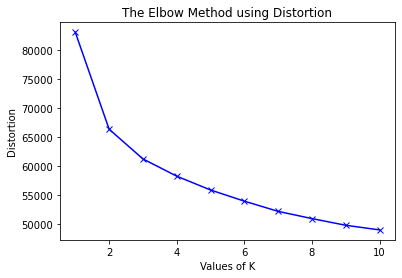

In [35]:
plt.plot(cluster_nums, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

The elbow graph shows that the optimal number of clusters is either 2 or 3. We should use the silhouette method to make sure.

### Silhouette Method for Choosing k

In [37]:
cluster_nums = [2,3,4,5,6,7,8,9,10]
for k in cluster_nums:
    kmeans = KMeans(n_clusters=k, init='k-means++') 
    kmeans.fit_predict(inputs)
    score = silhouette_score(inputs, kmeans.labels_, metric='euclidean')
    print(k)
    print('Silhouetter Score: %.3f' % score)

2
Silhouetter Score: 0.177
3
Silhouetter Score: 0.128
4
Silhouetter Score: 0.089
5
Silhouetter Score: 0.103
6
Silhouetter Score: 0.084
7
Silhouetter Score: 0.082
8
Silhouetter Score: 0.079
9
Silhouetter Score: 0.077
10
Silhouetter Score: 0.067


The Silhouetter Score for k = 2 is the highest. Therefore we will use k = 2.

### Plotting Clusters

In [38]:
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++') 
predicted_labels = kmeans.fit_predict(inputs)

In [39]:
predicted_labels

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [40]:
cluster_df = data1
cluster_df['Kmeans_cluster_labels'] = predicted_labels
cluster_df

/var/folders/8h/trr3c7zs2_52856n64wsm0280000gn/T/ipykernel_20467/3664777390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Kmeans_cluster_labels'] = predicted_labels


,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,poor_fair_health,poor_phys_health_days,...,income_ineq,child_single_parent_house,social_associations,violent_crime,air_pollution,water_violations,housing_probs,driving_alone,long_commute_alone,Kmeans_cluster_labels
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,0.201,4.510042,...,5.135446,0.276040,12.887290,272.282220,9.5,0.0,0.147289,0.867089,0.405,0
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,0.172,4.168866,...,4.386478,0.183638,10.123906,203.660396,7.2,0.0,0.124205,0.829966,0.379,1
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,0.311,5.884415,...,5.994927,0.540406,7.291582,414.277861,9.0,0.0,0.154600,0.840327,0.368,0
5,1,7,1007,AL,Bibb County,2022,1.0,11191.474323,0.250,5.161337,...,5.394051,0.367041,8.930964,89.349126,9.4,0.0,0.111842,0.876526,0.553,0
6,1,9,1009,AL,Blount County,2022,1.0,10787.014541,0.232,4.948393,...,4.764969,0.225584,7.436101,482.690611,9.4,0.0,0.104612,0.883416,0.598,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163,3.495993,...,4.185182,0.157228,8.974329,300.494146,5.4,0.0,0.100189,0.756772,0.188,1
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116,2.779692,...,3.764975,0.185105,18.325946,253.652173,5.2,1.0,0.182314,0.662721,0.156,1
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172,3.792121,...,3.666622,0.107885,3.460892,71.006517,6.9,1.0,0.105365,0.793139,0.179,1
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173,3.660729,...,3.523700,0.159215,16.655990,78.266105,5.2,0.0,0.084795,0.838251,0.076,1


In [41]:
cluster_groups = cluster_df.groupby(['Kmeans_cluster_labels', 'state']).size()
cluster_groups

Kmeans_cluster_labels  state
0                      AL       56
                       AR       67
                       AZ        7
                       CA        6
                       CO        3
                                ..
1                      VT       14
                       WA       33
                       WI       70
                       WV       10
                       WY       23
Length: 90, dtype: int64

In [42]:
cluster1 = cluster_df[cluster_df.Kmeans_cluster_labels == 1]['state'].value_counts()
cluster0 = cluster_df[cluster_df.Kmeans_cluster_labels == 0]['state'].value_counts()

<AxesSubplot:>

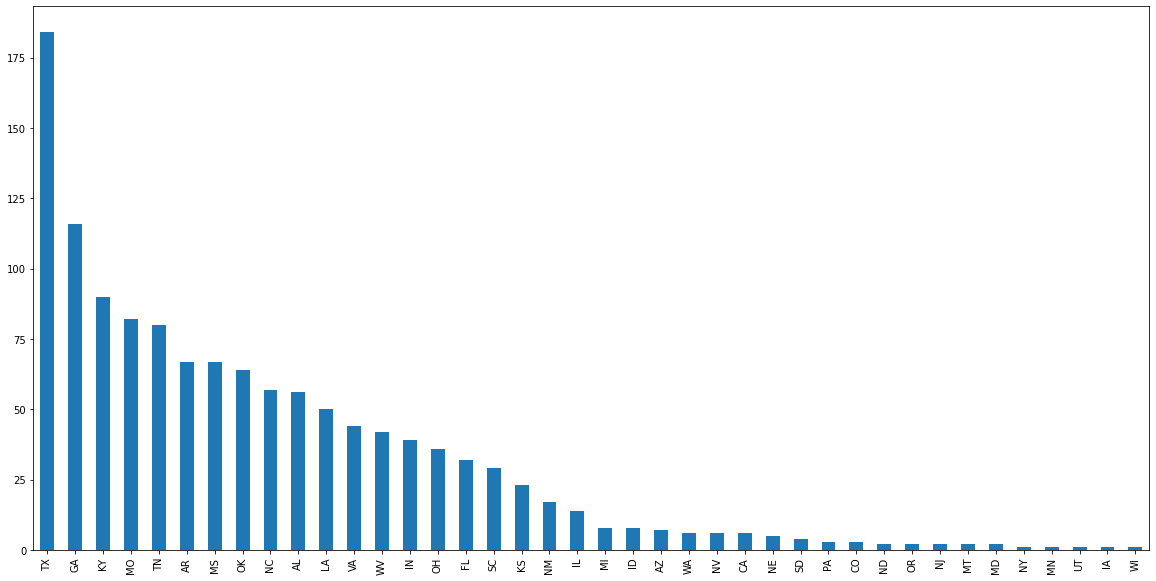

In [43]:
plt.figure(figsize=(20,10))
cluster0.plot.bar()

<AxesSubplot:>

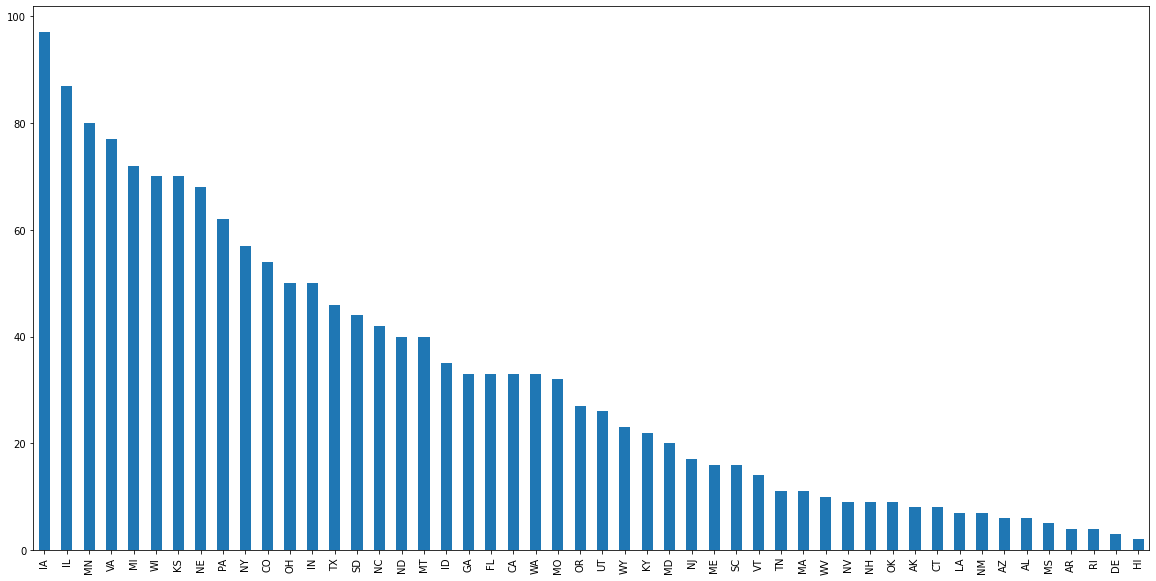

In [44]:
plt.figure(figsize=(20,10))
cluster1.plot.bar()

It seems like one cluster contains alot of counties from Texas and other southern states. The other cluster seems to contain more counties from Iowa and other Midwest and Northeast states. 

## Supervised Learning

### Create train and test data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2)

### Linear Regression

Training

In [46]:
from sklearn import linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print('Coefficients: ', reg.coef_)

Coefficients:  [ 0.29296791  0.03248887 -0.01334739 -0.05129801 -0.0405432  -0.11527576
  0.03305376  0.06666116  0.20105707  0.02155462 -0.01347576  0.01840675
  0.02858581  0.03120882 -0.10916797 -0.03038657  0.09524863  0.0340483
  0.02929253  0.21418093  0.01118167  0.11665972  0.02870735  0.07233291
 -0.05733382 -0.02264873 -0.01821637  0.05643269  0.05826639]


Testing

In [47]:
y_pred = reg.predict(x_test)
y_pred

array([ 0.40948485, -0.88480569, -0.59548781,  1.85600511, -0.07377303,
        0.60774381,  0.31618955,  1.23779428,  0.39754144, -0.23629002,
       -0.92050939,  0.4526651 ,  0.25579249, -0.7326703 , -0.85899644,
       -0.48044667, -0.37808601, -0.09764126, -0.64357074,  1.57152501,
       -0.27223346,  0.97664006,  0.22759849,  0.35851025,  0.1014293 ,
       -1.11316924, -0.52658111,  0.92256587, -0.12485701, -0.94136822,
       -0.81437295, -0.95366821, -0.29301222,  1.00839362,  0.58989189,
        0.1113701 , -0.31221094,  0.82579387,  0.25903844, -0.15868739,
        0.25351877, -1.2581994 , -1.34742533, -0.8271243 ,  0.17380371,
       -0.57125968, -0.05155278,  1.42050294, -0.48474438, -0.71572001,
        0.349811  , -0.15491269, -0.14538648, -0.31035277,  0.91809638,
        0.03998861,  1.69813435, -0.56967208, -1.39363355,  1.5838055 ,
       -0.16637559, -0.12184033,  0.96206801,  1.71557708, -0.40789259,
        0.66552586, -0.14555594,  0.50353234, -0.65529873,  1.14

Evaluation

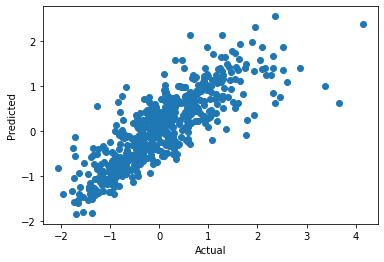

In [48]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

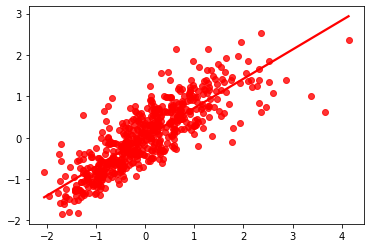

In [49]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [50]:
from sklearn.metrics import r2_score

print("MAE: %.3f" %metrics.mean_absolute_error(y_test, y_pred))
print("MSE: %.3f" %metrics.mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2: ', r2_score(y_test, y_pred))

MAE: 0.385
MSE: 0.284
RMSE: 0.533
R^2:  0.689624880655028


The linear regression model seems to be alright but it the RMSE and accuracy show that there is room for improviement. It could be useful to examine the linear regression coefficients and remove the variables that do not seem to have a large impact on the outcome.

Feature Importance

<BarContainer object of 29 artists>

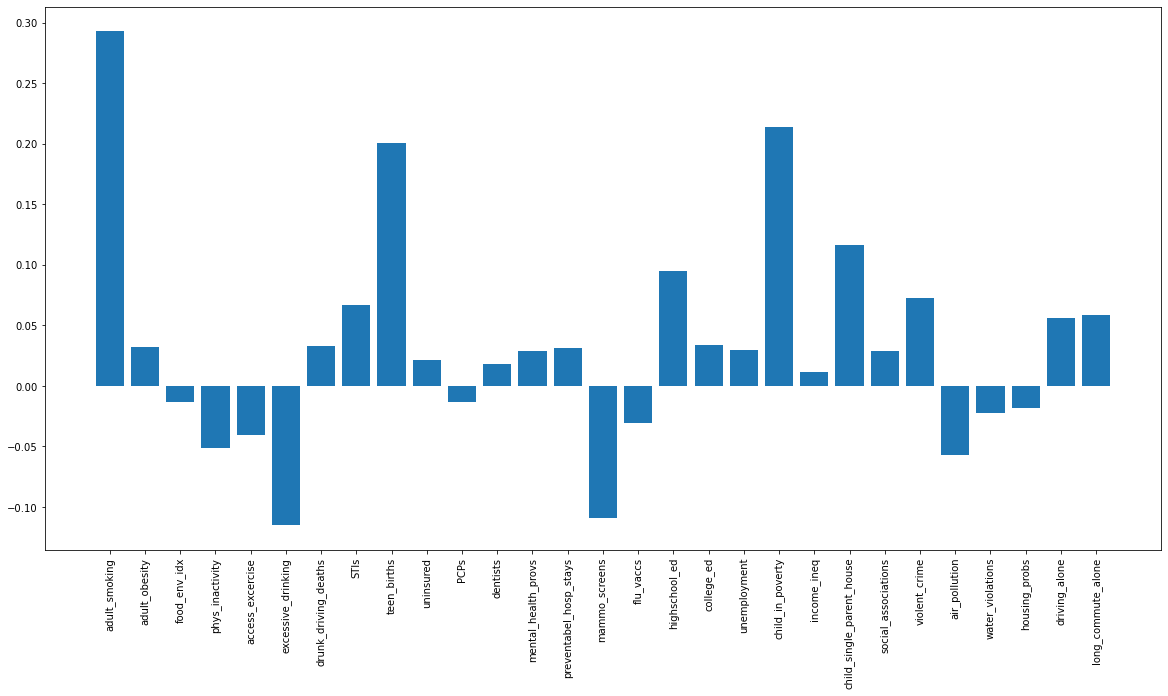

In [51]:
factors = data1.loc[:, 'adult_smoking':].columns.tolist()
factors.pop()
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(factors, reg.coef_)

In [53]:
i = 1
for importance, name in sorted(zip(abs(reg.coef_), factors),reverse=True):
    print(i, name, importance)
    i += 1

1 adult_smoking 0.2929679109276659
2 child_in_poverty 0.21418093081266978
3 teen_births 0.20105706613494218
4 child_single_parent_house 0.11665971923470567
5 excessive_drinking 0.11527575990721754
6 mammo_screens 0.10916797135463839
7 highschool_ed 0.09524863045819112
8 violent_crime 0.07233290777640526
9 STIs 0.06666116442710081
10 long_commute_alone 0.058266390246089754
11 air_pollution 0.0573338184985883
12 driving_alone 0.056432687372683706
13 phys_inactivity 0.05129800907945139
14 access_excercise 0.04054320044597488
15 college_ed 0.034048297831062536
16 drunk_driving_deaths 0.03305375762800381
17 adult_obesity 0.032488865757150445
18 preventabel_hosp_stays 0.03120882220047009
19 flu_vaccs 0.0303865652093261
20 unemployment 0.02929253352395959
21 social_associations 0.028707353850480455
22 mental_health_provs 0.028585814103917043
23 water_violations 0.02264873377853157
24 uninsured 0.021554623961530364
25 dentists 0.018406752392916375
26 housing_probs 0.018216368930661975
27 PCPs 

### Decision Trees

Training

In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 5, max_features = 10)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=10)

Testing

In [55]:
y_pred_dt = regressor.predict(x_test)

Evaluation

In [56]:
print("MAE: %.3f" %metrics.mean_absolute_error(y_test, y_pred_dt))
print("MSE: %.3f" %metrics.mean_squared_error(y_test, y_pred_dt))
print("RMSE: %.3f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))
print('R^2: ', r2_score(y_test, y_pred_dt))

MAE: 0.514
MSE: 0.546
RMSE: 0.739
R^2:  0.4028251757051934


The decision tree performs significantly worse compared to linear regression. This is most likely due to the large number of decision variables inputted into this model. This model can be improved by some feature selection and usage of parameters such as max_depth, max_features, min_samples_leaf, etc. Bagging and random forest could also improve model performance.

Feature Importance

<BarContainer object of 29 artists>

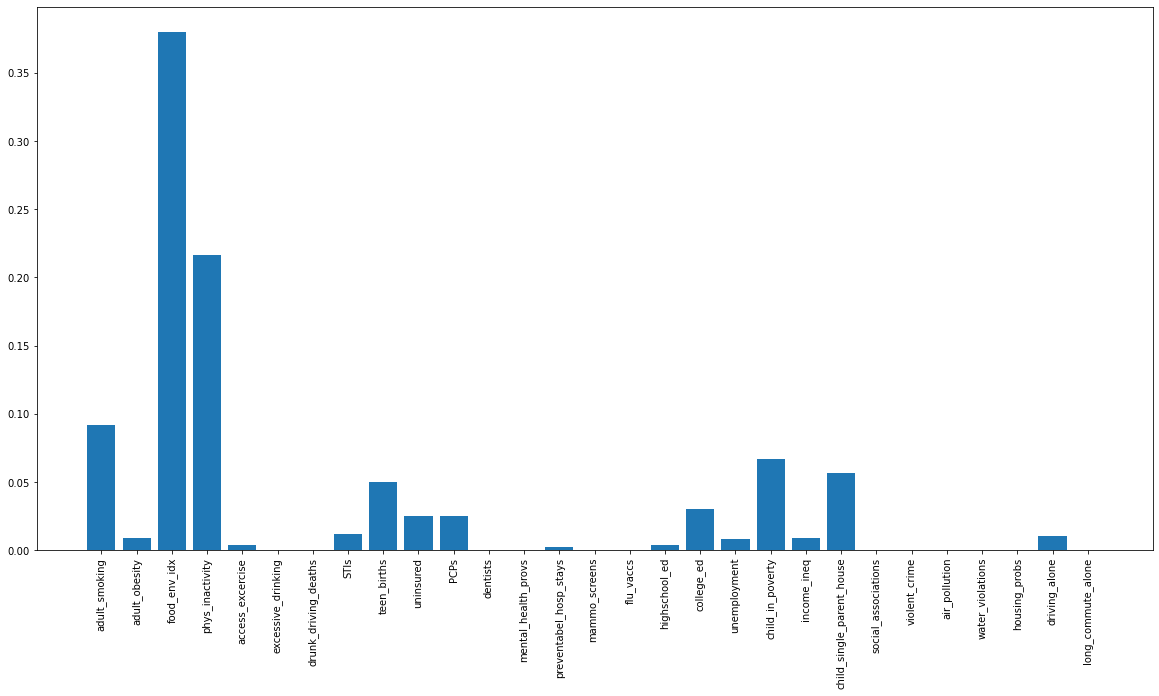

In [57]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(factors, regressor.feature_importances_)

In [58]:
i = 1
for importance, name in sorted(zip(regressor.feature_importances_, factors),reverse=True):
    print(i, name, importance)
    i += 1

1 food_env_idx 0.37958285598897534
2 phys_inactivity 0.2161316658302222
3 adult_smoking 0.09203702291338542
4 child_in_poverty 0.06694388873220702
5 child_single_parent_house 0.05655090463622742
6 teen_births 0.05022031398854034
7 college_ed 0.030147297024058974
8 uninsured 0.02522397722270811
9 PCPs 0.02507684895124993
10 STIs 0.011610785221390406
11 driving_alone 0.010623263694572569
12 income_ineq 0.008796042519673723
13 adult_obesity 0.008626136762488915
14 unemployment 0.008152917070063038
15 access_excercise 0.004128909734825383
16 highschool_ed 0.003780300633061386
17 preventabel_hosp_stays 0.00236686907634986
18 water_violations 0.0
19 violent_crime 0.0
20 social_associations 0.0
21 mental_health_provs 0.0
22 mammo_screens 0.0
23 long_commute_alone 0.0
24 housing_probs 0.0
25 flu_vaccs 0.0
26 excessive_drinking 0.0
27 drunk_driving_deaths 0.0
28 dentists 0.0
29 air_pollution 0.0


## Final Thoughts

Comparing the two models, the multiple linear regression model seems to perform better. However, further refinement of the models should be done before making any concrete judgements. Decision Trees can also be somewhat random with which variables it will use to split the data. Therefore, it is difficult to understand which features it trully thinks are important. In order to be more certain, random forest should be used.

Out of both models, smoking, child poverty, and single parent households are the common top 5 factors with high impact on the health outcome. Using these models, focusing policy on improving these factors would be the best use of resources. 